In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [75]:
import pandas as pd 
data = pd.read_csv('titanic-passengers.csv', sep=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [77]:
from pandas.core.base import DataError
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(data)

In [60]:

from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

tree = tree.DecisionTreeClassifier(max_depth = 2)

tree.fit(x_train, y_train)  
y_pred=tree.predict(x_test)  
print("Accuracy:{}".format(accuracy_score(y_test, y_pred)))

Accuracy:0.770949720670391


In [ ]:
x

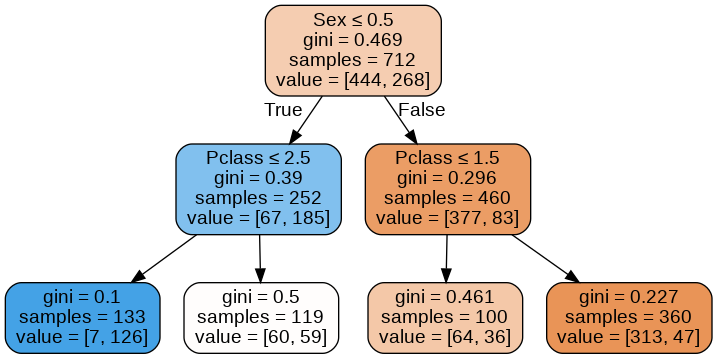

In [61]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree,out_file=dot_data,filled=True,rounded=True,feature_names=x.columns,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

from the above decision tree we conclude that 252 women took pclass 1 or 2 and 133 of them survived while 119 didn't.
And 460 men took pclass 2 or 3, 100 of them survived while 360 didn't.

In [62]:
x1=data.drop(["Survived","Name", "Cabin", "Ticket", "Embarked","Pclass","Parch","SibSp","Fare","PassengerId"], axis=1)
y1= data["Survived"]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.20,random_state=10)

tree1 = DecisionTreeClassifier(max_depth = 2)

tree1.fit(x1_train, y1_train)  
y1_pred=tree1.predict(x1_test)  
print("Accuracy:{}".format(accuracy_score(y1_test, y1_pred)))

Accuracy:0.7932960893854749


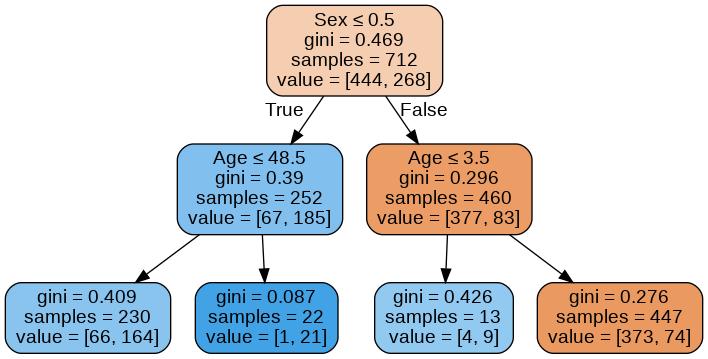

In [63]:
dot_data = StringIO()
export_graphviz(tree1,out_file=dot_data,filled=True,rounded=True,feature_names=x1.columns,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

the second model performed better than the first one
0.79 > 0.77

In [79]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics  

x2=data[["Survived","Pclass"]]
y2=data["Survived"]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.20,random_state=10)

clf=RandomForestClassifier(n_estimators=100) 
clf.fit(x2_train, y2_train)  
y2_pred=clf.predict(x2_test) 
print("Accuracy:", metrics.accuracy_score(y2_test, y2_pred))

Accuracy: 1.0


perfect performance compared with the two previous one